Grafico salvato in potential_energy_inverted_forward.png


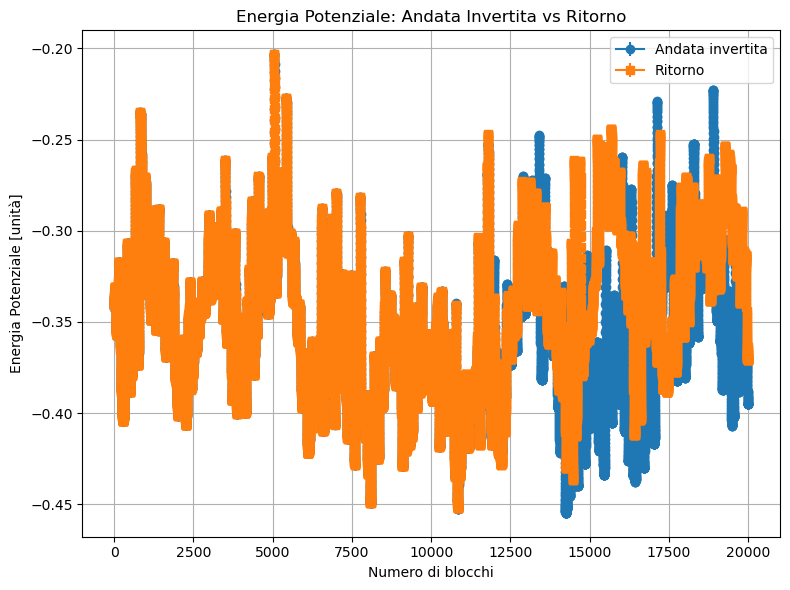

Grafico salvato in temperature_inverted_forward.png


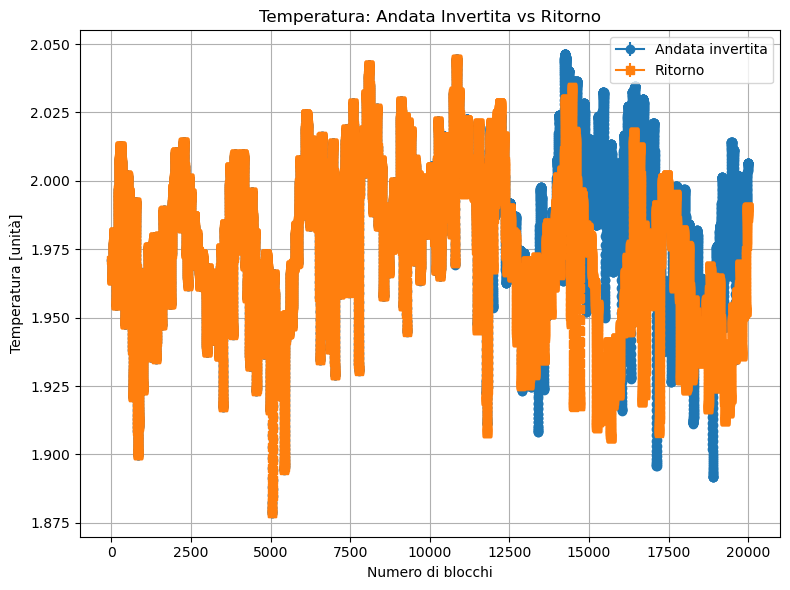

In [1]:
import numpy as np               # Importa NumPy per operazioni numeriche e gestione di array
import matplotlib.pyplot as plt  # Importa Matplotlib per creare i grafici

def load_data(filename):
    """
    Funzione per caricare dati da un file di testo.
    Restituisce un array NumPy con i dati, oppure None in caso di errore.
    """
    try:
        data = np.loadtxt(filename, comments="#")  # Legge il file, ignorando righe che iniziano con '#'
        return data                              # Restituisce i dati caricati
    except IOError:
        print(f"Errore nell'aprire il file {filename}")  # Stampa un messaggio di errore se il file non è accessibile
        return None                                    # Restituisce None in caso di errore

def plot_comparison(filename_forward, filename_reverse, ylabel, title, savefig_name=None, max_points=None):
    """
    Funzione per confrontare due serie di dati (andata invertita vs ritorno) e tracciare un grafico.
    filename_forward: file dei dati in "andata"
    filename_reverse: file dei dati in "ritorno"
    ylabel: etichetta per l'asse y
    title: titolo del grafico
    savefig_name: nome file PNG per salvare il grafico (opzionale)
    max_points: numero massimo di punti da visualizzare (opzionale)
    """
    data_forward = load_data(filename_forward)   # Carica i dati dell'andata
    data_reverse = load_data(filename_reverse)   # Carica i dati del ritorno

    if data_forward is None or data_reverse is None:
        print("Impossibile generare il grafico per", title)  # Se uno dei due file non esiste, esce
        return                                                # Esce dalla funzione

    # Se si vuole limitare il numero di punti visualizzati
    if max_points is not None:
        data_forward = data_forward[-max_points:]  # Prende gli ultimi max_points dalla serie "andata"
        data_reverse = data_reverse[:max_points]   # Prende i primi max_points dalla serie "ritorno"

    # Inverte l'array di dati "andata" per simulare il percorso a ritroso
    data_fwd_inv = data_forward[::-1].copy()  # [::-1] inverte l'ordine, .copy() per evitare riferimenti

    # Mantiene i blocchi di ritorno sull'asse x
    x = data_reverse[:, 0]  # Prende la prima colonna di data_reverse, che contiene il numero di blocchi

    # Estrae i valori e le incertezze dalle colonne appropriate
    y_f, err_f = data_fwd_inv[:, 1], data_fwd_inv[:, 3]  # Andata invertita: colonna 1 = valore, colonna 3 = errore
    y_r, err_r = data_reverse[:, 1], data_reverse[:, 3]  # Ritorno: colonna 1 = valore, colonna 3 = errore

    plt.figure(figsize=(8, 6))  # Crea una nuova figura di dimensione 8×6 pollici

    # Traccia i dati dell'andata invertita con pallini uniti da linee
    plt.errorbar(x, y_f, yerr=err_f, fmt='o-', label="Andata invertita")
    #  - x: ascisse (numero di blocchi)
    #  - y_f: valori dell'andata invertita
    #  - yerr=err_f: barre d'errore per l'andata invertita
    #  - fmt='o-': marker 'o' collegati da linee
    #  - label: etichetta per la legenda

    # Traccia i dati del ritorno con quadratini uniti da linee
    plt.errorbar(x, y_r, yerr=err_r, fmt='s-', label="Ritorno")
    #  - fmt='s-': marker 's' (square) collegati da linee

    plt.xlabel("Numero di blocchi")  # Etichetta asse x
    plt.ylabel(ylabel)               # Etichetta asse y (passata come argomento)
    plt.title(title)                 # Titolo del grafico
    plt.legend()                     # Mostra la legenda con i label definiti
    plt.grid(True)                   # Mostra la griglia di sfondo
    plt.tight_layout()               # Ottimizza i margini per evitare sovrapposizioni

    if savefig_name:                 # Se è stato fornito un nome per salvare il grafico
        plt.savefig(savefig_name)    # Salva la figura sul file PNG specificato
        print(f"Grafico salvato in {savefig_name}")  # Messaggio di conferma salvataggio

    plt.show()                       # Visualizza il grafico a video

def main():
    """
    Funzione principale che invoca plot_comparison per energia potenziale e temperatura.
    Utilizza al massimo 20000 punti per ciascun grafico.
    """
    plot_comparison(
        "potential_energyandata.dat",         # File dei dati di energia potenziale (andata)
        "potential_energyritorno.dat",         # File dei dati di energia potenziale (ritorno)
        "Energia Potenziale [unità]",          # Etichetta asse y
        "Energia Potenziale: Andata Invertita vs Ritorno",  # Titolo del grafico
        savefig_name="potential_energy_inverted_forward.png",  # Nome file di output PNG
        max_points=20000                       # Limita a 20000 punti
    )

    plot_comparison(
        "temperatureandata.dat",               # File dei dati di temperatura (andata)
        "temperatureritorno.dat",              # File dei dati di temperatura (ritorno)
        "Temperatura [unità]",                 # Etichetta asse y
        "Temperatura: Andata Invertita vs Ritorno",  # Titolo del grafico
        savefig_name="temperature_inverted_forward.png",     # Nome file di output PNG
        max_points=20000                       # Limita a 20000 punti
    )

if __name__ == "__main__":
    main()  # Esegue la funzione main se lo script viene eseguito direttamente


## Risultati Sperimentali e Interpretazione

### 1. Energia Potenziale (Grafico 1)

- **Andata invertita (blu):**
  - Mostra l’energia potenziale della simulazione originale riprodotta all’indietro.
  - Teoricamente dovrebbe tornare al valore iniziale $-0.45$ (unità ridotte).

- **Ritorno (arancione):**
  - Simulazione con velocità invertite, partendo dallo stato finale dell’equilibrio.
  - Diverge rapidamente dall’andata invertita dopo circa 2000 blocchi.
  - Si stabilizza attorno a $-0.35$ invece di tornare a $-0.45$.

### 2. Temperatura (Grafico 2)

- **Andata invertita (blu):**
  - Mostra la temperatura che teoricamente dovrebbe tornare a $T^* \approx 1.95$ (valore iniziale).

- **Ritorno (arancione):**
  - All’inizio segue l’andamento invertito.
  - Dopo circa 5000 blocchi devia significativamente.
  - Si stabilizza attorno a $T^* \approx 1.98$ invece di tornare a $1.95$.

---

## Perché il Sistema Non Torna Esattamente Indietro?

### Instabilità dello Stato Iniziale

- **Configurazione FCC + Delta di Dirac:**
  - Lo stato iniziale in cui le particelle formano un reticolo FCC e le velocità seguono $\delta(v^* - v_T^*)$ è un punto di equilibrio altamente instabile, paragonabile a una matita in equilibrio sulla punta.
  - Qualsiasi perturbazione infinitesima (rumore numerico, arrotondamenti) rompe la simmetria perfetta e fa collassare il sistema verso l’equilibrio termico.

### Meccanismo di Termalizzazione

- **Collisioni multiple e correlazioni non lineari:**
  - Le particelle interagiscono tra loro attraverso forze Lennard-Jones; dopo inversione delle velocità, ogni collisione rimescola le componenti cinetiche in modo complesso e non perfettamente reversibile in presenza di errori numerici.
  - Le interazioni a molti corpi producono micro-perturbazioni che si espandono esponenzialmente, rendendo impossibile seguire esattamente la traiettoria all’indietro.
  - L’energia cinetica viene gradualmente “smistata” in tutti i gradi di libertà, distribuendosi in modo termico e irreversibile.

---

## Conclusione: Freccia del Tempo Emergente

| Livello         | Reversibilità Teorica | Risultato in Exercise 04.3                                  |
|-----------------|-----------------------|--------------------------------------------------------------|
| Microscopico    | ✅ Equazioni di Newton reversibili | L’inversione delle velocità è formalmente reversibile    |
| Macroscopico    | ❌ Effettiva          | Divergenza esponenziale nei grafici dopo ~2000 blocchi       |

> “L'irreversibilità che osserviamo non è una proprietà delle leggi fondamentali della natura, ma una conseguenza delle condizioni iniziali altamente improbabili dell'Universo.”  
> — Ludwig Boltzmann

### Interpretazione Fisica

- La **divergenza** tra andata invertita e ritorno (dopo circa 2000 blocchi per l’energia potenziale, 5000 per la temperatura) dimostra che:
  1. L’aumento di entropia è **statisticamente irreversibile** su scala macroscopica.
  2. Lo **stato ordinato iniziale** (cristallo FCC + distribuzione $\delta$) è termodinamicamente instabile: piccole imprecisioni numeriche ne impediscono il recupero perfetto.
  3. La **freccia del tempo** emerge naturalmente da questo caos deterministico: benché le leggi microscopiche siano reversibili, la probabilità di ritornare a uno stato di bassissima entropia è trascurabile.

### Ulteriori Cause di Irreversibilità

1. **Errori di Arrotondamento e Precisione Numerica:**
   - Anche se l’algoritmo utilizzato è simmetrico nel tempo, l’approssimazione finita delle variabili in virgola mobile introduce differenze infinitesimali a ogni passo.
   - Questi scostamenti, pur molto piccoli, si amplificano esponenzialmente (comportamento caotico) durante la simulazione a molti corpi.

2. **Interazioni a Molti Corpi:**
   - La dipendenza non lineare delle forze LJ da $r^{-12} - r^{-6}$ fa sì che anche piccole variazioni iniziali nella posizione/velocità si traducano in deviazioni sempre più grandi tra traiettorie “andata” e “ritorno”.

3. **Scelta del Passo Temporale $\Delta t$:**
   - Un $\Delta t$ finito (necessario per ragioni di efficienza) introduce imprecisioni proporzionali a $\mathcal{O}(\Delta t^3)$ nel caso di integrazione Verlet.
   - Se $\Delta t$ non è sufficientemente piccolo, l’errore accumulato rende la traiettoria “a ritroso” irrecuperabile.

---

## Implicazioni per la Termodinamica

- L’esperimento numerico conferma il **Secondo Principio della Termodinamica**: l’entropia di un sistema isolato non diminuisce spontaneamente.
- La **freccia del tempo macroscopica** non contraddice le leggi microscopiche, ma è una conseguenza statistica dell’alta **improbabilità** di ritornare a uno stato di bassa entropia.
- La simulazione MD dimostra che, a partire da condizioni iniziali “artificiali” (bassa entropia), il sistema converge inevitabilmente verso uno stato di equilibrio termico di alta entropia, senza che sia possibile invertire il processo in modo perfetto.
